In [2]:
import os
import sys



```
# This is formatted as code
```

**Baseline Test Data**: text to summarize - replace this with data from other sources

In [8]:
original_text = 'Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. They never have been discussed by their parents about the harmful effects of junk foods over health. According to the research by scientists, it has been found that junk foods have negative effects on the health in many ways. They are generally fried food found in the market in the packets. They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers. Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life. It makes able a person to gain excessive weight which is called as obesity. Junk foods tastes good and looks good however do not fulfil the healthy calorie requirement of the body. Some of the foods like french fries, fried foods, pizza, burgers, candy, soft drinks, baked goods, ice cream, cookies, etc are the example of high-sugar and high-fat containing foods. It is found according to the Centres for Disease Control and Prevention that Kids and children eating junk food are more prone to the type-2 diabetes. In type-2 diabetes our body become unable to regulate blood sugar level. Risk of getting this disease is increasing as one become more obese or overweight. It increases the risk of kidney failure. Eating junk food daily lead us to the nutritional deficiencies in the body because it is lack of essential nutrients, vitamins, iron, minerals and dietary fibers. It increases risk of cardiovascular diseases because it is rich in saturated fat, sodium and bad cholesterol. High sodium and bad cholesterol diet increases blood pressure and overloads the heart functioning. One who like junk food develop more risk to put on extra weight and become fatter and unhealthier. Junk foods contain high level carbohydrate which spike blood sugar level and make person more lethargic, sleepy and less active and alert. Reflexes and senses of the people eating this food become dull day by day thus they live more sedentary life. Junk foods are the source of constipation and other disease like diabetes, heart ailments, clogged arteries, heart attack, strokes, etc because of being poor in nutrition. Junk food is the easiest way to gain unhealthy weight. The amount of fats and sugar in the food makes you gain weight rapidly. However, this is not a healthy weight. It is more of fats and cholesterol which will have a harmful impact on your health. Junk food is also one of the main reasons for the increase in obesity nowadays.This food only looks and tastes good, other than that, it has no positive points. The amount of calorie your body requires to stay fit is not fulfilled by this food. For instance, foods like French fries, burgers, candy, and cookies, all have high amounts of sugar and fats. Therefore, this can result in long-term illnesses like diabetes and high blood pressure. This may also result in kidney failure. Above all, you can get various nutritional deficiencies when you don’t consume the essential nutrients, vitamins, minerals and more. You become prone to cardiovascular diseases due to the consumption of bad cholesterol and fat plus sodium. In other words, all this interferes with the functioning of your heart. Furthermore, junk food contains a higher level of carbohydrates. It will instantly spike your blood sugar levels. This will result in lethargy, inactiveness, and sleepiness. A person reflex becomes dull overtime and they lead an inactive life. To make things worse, junk food also clogs your arteries and increases the risk of a heart attack. Therefore, it must be avoided at the first instance to save your life from becoming ruined.The main problem with junk food is that people don’t realize its ill effects now. When the time comes, it is too late. Most importantly, the issue is that it does not impact you instantly. It works on your overtime; you will face the consequences sooner or later. Thus, it is better to stop now.You can avoid junk food by encouraging your children from an early age to eat green vegetables. Their taste buds must be developed as such that they find healthy food tasty. Moreover, try to mix things up. Do not serve the same green vegetable daily in the same style. Incorporate different types of healthy food in their diet following different recipes. This will help them to try foods at home rather than being attracted to junk food.In short, do not deprive them completely of it as that will not help. Children will find one way or the other to have it. Make sure you give them junk food in limited quantities and at healthy periods of time. '

**Set a working directory here and put documents to summarize here**

In [ ]:
!pip install bert-extractive-summarizer

In [ ]:
!pip install spacy
!pip install transformers # > 2.2.0
!pip install neuralcoref

In [ ]:
#!pip install tensorflow==2.0
#!pip install --upgrade tensorflow-gpu==2.0
!pip3 install --upgrade tensorflow-gpu
!pip install tensorflow_hub
!pip install bert-for-tf2
!pip install sentencepiece

# **Extractive Summarizer with LSA (Latent Semantic Analysis)**:

Latent Semantic Analysis is a unsupervised learning algorithm that can be used for extractive text summarization.

It extracts semantically significant sentences by applying singular value decomposition(SVD) to the matrix of term-document frequency. 

Let me demonstrate how to use LSA for summarization . First, import the summarizer from sumy.

In [ ]:
!pip install sumy    
!pip install readability-api

In [ ]:
import nltk
nltk.download('punkt')

The parser has been created . It’s time to initialize the summarizer model and pass your document and desired no of sentences as input.

In [14]:
# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
parser=PlaintextParser.from_string(original_text,Tokenizer('english'))

In [15]:
# creating the summarizer
# Import the summarizer
from sumy.summarizers.lsa import LsaSummarizer
lsa_summarizer =LsaSummarizer()
lsa_summary = lsa_summarizer(parser.document,3)

# Printing the summary
for sentence in lsa_summary:
    print(sentence)

Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children.
To make things worse, junk food also clogs your arteries and increases the risk of a heart attack.
Therefore, it must be avoided at the first instance to save your life from becoming ruined.The main problem with junk food is that people don’t realize its ill effects now.


# **Extractive Summarizer with BERT**:
Paper: https://arxiv.org/abs/1906.04165

The quality of the extractive summaries are closely related to the quality of the pdf to text extraction. We see that our pdf are very compicated with multi font sizes, hidden characters, html hyperlinks, figures and tables as well as acknowledgments and numerical texts.

Working with PDFs is difficult due to the extreme flexibility given by the PDF format. The main problem is that PDF was never really designed as a data input format, but rather, it was designed as an output format giving fine grained control over the resulting document.

At its core, the PDF format consists of a stream of instructions describing how to draw on a page. In particular, text data isn’t stored as paragraphs - or even words - but as characters which are painted at certain locations on the page. As a result, most of the content semantics are lost when a text or word document is converted to PDF - all the implied text structure is converted into an almost amorphous soup of characters floating on pages.
 
 Pdf extraction issues:
 * off page characters
 * Small / invisible characters on page
 * Too many spaces
 * Not enough spaces
 * Embedded fonts
 * Word and paragraph detection
 * Text and paragraph order
 * Sentence beginning and end not clearly marked in some cases
 * Embedded images

*Why not OCR all the time*?
While OCR might help with some of the issues shown above, it does come with its own set of drawbacks.

* Long processing time: Running OCR on a PDF scan usually takes at least an order of magnitude longer than extracting the text directly from the PDF.
*Difficulties with non-standard characters and glyphs: OCR algorithms have a hard time dealing with novel characters, such as smiley faces, stars/circles/squares (used in bullet point lists), superscripts, complex mathematical symbols etc.
* No text order hints: Ordering text extracted from a PDF document is easier as the insertion order hints, most of the time, at the correct reading order. Extracting text from images offers no such hints.


# **Summarizer Options**:

* model = Summarizer(
    model: This gets used by the hugging face bert library to load the model, you can supply a custom trained model here

    custom_model: If you have a pre-trained model, you can add the model class here.

    custom_tokenizer:  If you have a custom tokenizer, you can add the tokenizer here.

    hidden: Needs to be negative, but allows you to pick which layer you want the embeddings to come from.

    reduce_option: It can be 'mean', 'median', or 'max'. This reduces the embedding layer for pooling.

    sentence_handler: The handler to process sentences. If want to use coreference, instantiate and pass CoreferenceHandler instance
)

* model(
    body: str # The string body that you want to summarize

    ratio: float # The ratio of sentences that you want for the final summary

    min_length: int # Parameter to specify to remove sentences that are less than 40 characters

    max_length: int # Parameter to specify to remove sentences greater than the max length,
    
    num_sentences: Number of sentences to use. Overrides ratio if supplied.
)

In [12]:
from summarizer import Summarizer
model = Summarizer()
result = model(original_text, min_length=100, ratio=0.3) # remove sentences less than that many characters

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
print(result)

Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. It increases risk of cardiovascular diseases because it is rich in saturated fat, sodium and bad cholesterol. Reflexes and senses of the people eating this food become dull day by day thus they live more sedentary life. Junk foods are the source of constipation and other disease like diabetes, heart ailments, clogged arteries, heart attack, strokes, etc because of being poor in nutrition. You become prone to cardiovascular diseases due to the consumption of bad cholesterol and fat plus sodium.


# **Abstractive Summarization**:

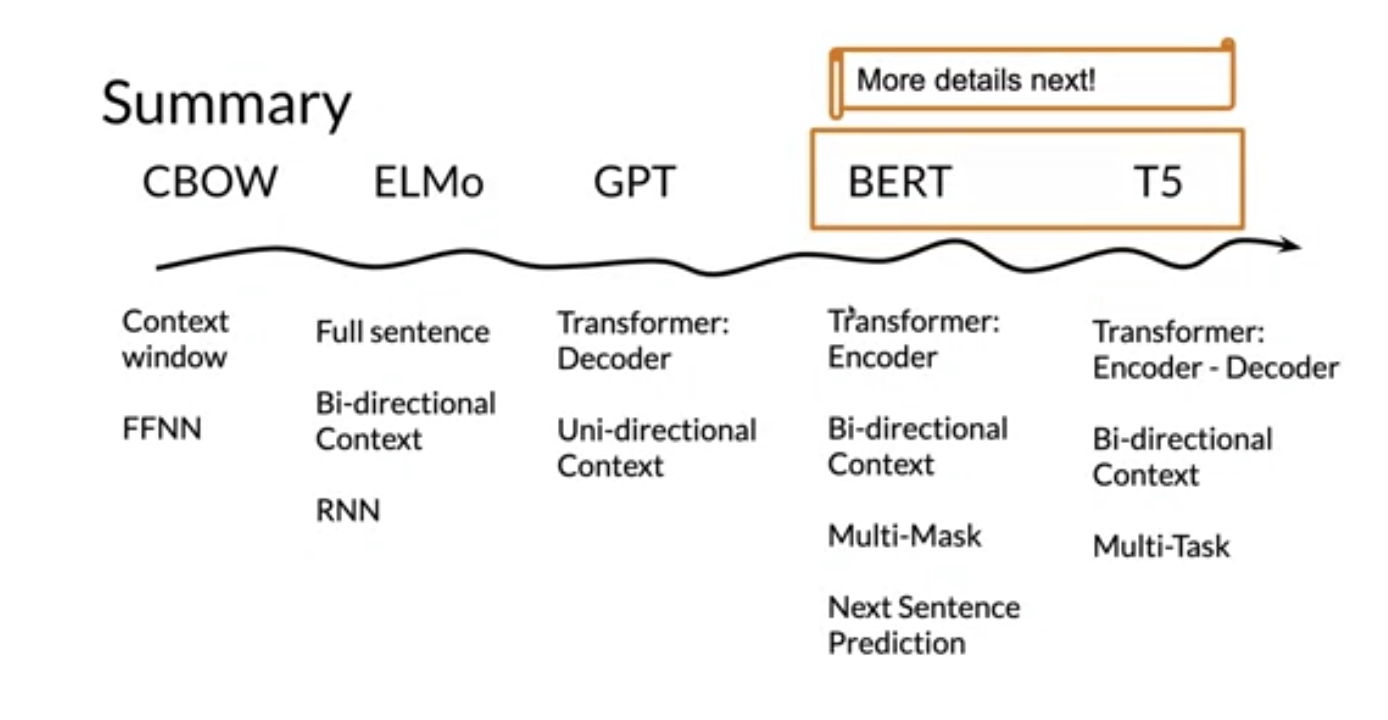

In [ ]:
from IPython.display import Image
Image("../transformers.png")

#**Summarization with BART Transformers**:

Transformers library of HuggingFace supports summarization with BART models.

Import the model and tokenizer. For problems where there is need to generate sequences , it is preferred to use BartForConditionalGeneration model.

In [ ]:
# Importing the model
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

”bart-large-cnn” is a pretrained model, fine tuned especially for summarization task. You can load the model using from_pretrained() method as shown below.

model.generate() has returned a sequence of ids corresponding to the summary of original text. You can convert the sequence of ids to text through decode() method.

In [17]:
# Importing model and tokenizer
from transformers import GPT2Tokenizer,GPT2LMHeadModel
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

# Loading the model and tokenizer for bart-large-cnn
tokenizer=BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model=BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Encoding the inputs and passing them to model.generate()
inputs = tokenizer.batch_encode_plus([original_text],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)

# Decoding and printing the summary
bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)


Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. According to the research by scientists, it has been found that junk foods have negative effects on the health.


# **Summarization with GPT-2 Transformers**:
GPT-2 transformer is another major player in text summarization, introduced by OpenAI. Thanks to transformers, the process followed is same just like with BERT Transformers.

First, you have to import the tokenizer and model. Make sure that you import a LM Head type model, as it is necessary to generate sequences. Next, load the pretrained gpt-2 model and tokenizer .
After loading the model, you have to encode the input text and pass it as an input to model.generate().

The summary_ids contains the sequence of ids corresponding to the text summary . You can decode it and print the summary

In [20]:
# Importing model and tokenizer
from transformers import GPT2Tokenizer,GPT2LMHeadModel

# Instantiating the model and tokenizer with gpt-2
tokenizer=GPT2Tokenizer.from_pretrained('gpt2')
model=GPT2LMHeadModel.from_pretrained('gpt2')

# Encoding text to get input ids & pass them to model.generate()
inputs=tokenizer.batch_encode_plus([original_text],return_tensors='pt',max_length=512)
summary_ids=model.generate(inputs['input_ids'],early_stopping=True)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but ``max_length`` is set to 20.This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


In [21]:
# Decoding and printing summary

GPT_summary=tokenizer.decode(summary_ids[0],skip_special_tokens=True)
print(GPT_summary)


Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. They never have been discussed by their parents about the harmful effects of junk foods over health. According to the research by scientists, it has been found that junk foods have negative effects on the health in many ways. They are generally fried food found in the market in the packets. They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers. Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life. It makes able a person to gain excessive weight which is called as obesity. Junk foods tastes good and looks good however do not fulfil the healthy calorie r

# **Summarization with T5 Transformers**:

T5 is an encoder-decoder model. It converts all language problems into a text-to-text format.

First, you need to import the tokenizer and corresponding model through below command.

It is preferred to use T5ForConditionalGeneration model when the input and output are both sequences.

In [4]:
# Importing requirements
from transformers import T5Tokenizer, T5Config, T5ForConditionalGeneration

In [5]:
# Instantiating the model and tokenizer 
my_model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

Next, you can pass the input_ids to the function generate(), which will return a sequence of ids corresponding to the summary.

The syntax will be: transformers.PreTrainedModel.generate (input_ids=None, max_length=None, min_length=None, num_beams=None)

Except input_ids, others parameters are optional and can be used to set the summary requirements.

In [9]:
# encoding the input text
input_ids=tokenizer.encode(original_text, return_tensors='pt', max_length=512)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [10]:
# Generating summary ids
summary_ids = my_model.generate(input_ids)
summary_ids

tensor([[    0, 32099,    11,   731,    16, 10004,     6,   306,    16, 16462,
             6,   731,    16,  1695, 12128,     6,   306,    16,  2656,     6]])

You can see that model has returned a tensor with sequence of ids. Now, use the decode() function to generate the summary text from these ids.

In [11]:
# Decoding the tensor and printing the summary.
t5_summary = tokenizer.decode(summary_ids[0])
print(t5_summary)

<pad> <extra_id_0> and low in calories, high in cholesterol, low in healthy nutrients, high in sugar,
